In [ ]:
#installing necessary packages
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=b394fa55210d995552fe1d1375a3b894efa46b2504a199a32474a776b4c60d4e
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [69]:
#all the packages that we have used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import date
from datetime import datetime
from pandasql import sqldf


In [107]:
# we load our data into pandas dataframes
activity = pd.read_csv('activity_played.csv')
stats = pd.read_csv('gen_player_stats.csv')
items = pd.read_csv('item_spend.csv')

Rahul's contributions (ocurrance intervals and date-time)

In [108]:
#CODE BLOCK TO GET FIRST OCCURANCE EACH PLAYER LOGGED IN

stats = stats.sort_values(by='occur_date')
#duplicate makes all repeats equal to true, so we flip the mask
first_occur = ~stats.duplicated(subset=['account_id'], keep= 'first')
first_occur_of_player = stats[first_occur]

first_occur_of_player = first_occur_of_player.copy()
first_occur_of_player['date'] = first_occur_of_player['occur_date'].astype('datetime64[ns]')

In [109]:
# number of day difference between start time and start of df
#We want to know when each user started playing during this timeframe as to not penalize users who started at a later date.

start_date = pd.Series('2020-09-01', index=range(len(first_occur_of_player)))
start_date = start_date.astype('datetime64[ns]')
test_series = pd.Series(first_occur_of_player['date'].values-start_date.values)

In [110]:
#test series b is the proper time difference, added to first_occur_of_players
max_days = pd.Timedelta('90 days')
test_series_b = max_days-test_series
first_occur_of_player['days_since_start'] = test_series_b.values


In [111]:
#df containing account id, days since they started, total time played, time played per day since they started
time_spent_per_day = first_occur_of_player[['account_id','days_since_start']]
time_spent_per_day = time_spent_per_day.sort_values(by='account_id')

player_playtime = stats.groupby('account_id').sum()['daily_playtime']
time_spent_per_day = time_spent_per_day.assign(time_played=player_playtime.values)

time_spent_per_day['days_since_start'] = time_spent_per_day['days_since_start'].dt.days
time_spent_per_day['play_time_per_day'] = time_spent_per_day['time_played']/time_spent_per_day['days_since_start']

time_spent_per_day = time_spent_per_day.set_index('account_id',drop=True)

Mateus' contributions (dummy variables and variable creation)

In [112]:
# Creating dummie columns for each categorial data present in the dataset.
activity_dummed=pd.get_dummies(activity)
#getting the sum of each category and grouping by each individual account_id. 
activity_grouped = activity_dummed.groupby(['account_id']).sum()
activity_grouped_no_normalization = activity_grouped.copy()
# for each column that contains a number other than 0 
activity_grouped['activity_type_Biker'].where(activity_grouped['activity_type_Biker'] <=0, 1, inplace=True)
activity_grouped['activity_type_Casino'].where(activity_grouped['activity_type_Casino'] <=0, 1, inplace=True)
activity_grouped['activity_type_Executive'].where(activity_grouped['activity_type_Executive'] <=0, 1, inplace=True)
activity_grouped['activity_type_Freeroam - Business Battles'].where(activity_grouped['activity_type_Freeroam - Business Battles'] <=0, 1, inplace=True)
activity_grouped['activity_type_Gunrunner'].where(activity_grouped['activity_type_Gunrunner'] <=0, 1, inplace=True)
activity_grouped['activity_type_Heist'].where(activity_grouped['activity_type_Heist'] <=0, 1, inplace=True)
activity_grouped['activity_type_Nightclub Owner'].where(activity_grouped['activity_type_Nightclub Owner'] <=0, 1, inplace=True)
activity_grouped['activity_type_Race'].where(activity_grouped['activity_type_Race'] <=0, 1, inplace=True)

columns = ['activity_type_Biker','activity_type_Casino','activity_type_Executive','activity_type_Freeroam - Business Battles','activity_type_Gunrunner','activity_type_Heist','activity_type_Nightclub Owner','activity_type_Race']

activity_grouped['diversity'] = activity_grouped[columns].sum(axis=1)
activity_grouped['diversity'] = activity_grouped['diversity'] /8
activity_grouped = activity_grouped[['diversity']]



In [113]:
items_dummed=pd.get_dummies(items[['account_id','item_type']])

items_grouped = items_dummed.groupby(['account_id']).sum()
items_grouped_no_normalization = items_grouped.copy()

items_grouped['item_type_BIKE'].where(items_grouped['item_type_BIKE'] <=0, 1, inplace=True)
items_grouped['item_type_BOAT'].where(items_grouped['item_type_BOAT'] <=0, 1, inplace=True)
items_grouped['item_type_CAR'].where(items_grouped['item_type_CAR'] <=0, 1, inplace=True)
items_grouped['item_type_CYCLE'].where(items_grouped['item_type_CYCLE'] <=0, 1, inplace=True)
items_grouped['item_type_HELICOPTER'].where(items_grouped['item_type_HELICOPTER'] <=0, 1, inplace=True)
items_grouped['item_type_JET'].where(items_grouped['item_type_JET'] <=0, 1, inplace=True)
items_grouped['item_type_OTHER'].where(items_grouped['item_type_OTHER'] <=0, 1, inplace=True)
items_grouped['item_type_PLANE'].where(items_grouped['item_type_PLANE'] <=0, 1, inplace=True)
items_grouped['item_type_PROPERTY'].where(items_grouped['item_type_PROPERTY'] <=0, 1, inplace=True)
items_grouped['item_type_TANK'].where(items_grouped['item_type_TANK'] <=0, 1, inplace=True)
items_grouped['item_type_TRUCK'].where(items_grouped['item_type_TRUCK'] <=0, 1, inplace=True)
items_grouped['item_type_WEAPON'].where(items_grouped['item_type_WEAPON'] <=0, 1, inplace=True)

columns = ['item_type_BIKE','item_type_BOAT','item_type_CAR','item_type_CYCLE','item_type_HELICOPTER','item_type_JET','item_type_OTHER','item_type_PLANE','item_type_PROPERTY','item_type_TANK','item_type_TRUCK','item_type_WEAPON']

items_grouped['diversity'] = items_grouped[columns].sum(axis=1)
items_grouped['diversity'] =items_grouped['diversity'] /12
items_grouped =items_grouped['diversity']

Carlos' contributions (data analysis for slides)

In [77]:
#create a column with real dollar values by multiplying by current exchange rate with GTA V currency-dollars
stats['pvc_balance_dollars'] = (stats['pvc_balance'] * 0.0000196006)

In [78]:
#load packages to use sql commands to look through the dataset
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

data_for_console = pysqldf('''select platform_id, count(platform_id) as count
from stats 
group by platform_id
order by count desc''')

data_for_console

,platform_id,count
0,XBOX,141314
1,PS4,66922
2,PC,39748


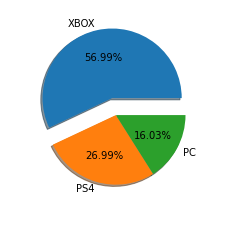

In [79]:
#find a pie chart of the percentage of users in each console
y = np.array([141314, 66922, 39748])
mylabels = ["XBOX", "PS4", "PC"]
myexplode = [0.2, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct='%1.2f%%', radius= 0.8)
plt.show() 

In [80]:
#total amount of real money spent by users of each console
data_for_console2 = pysqldf('''select platform_id, count(platform_id) as amount_of_users, sum(pvc_balance_dollars) as total_amount_spent
from stats 
group by platform_id
order by total_amount_spent desc''')
data_for_console2

,platform_id,amount_of_users,total_amount_spent
0,PS4,66922,42367.721584
1,XBOX,141314,35761.831574
2,PC,39748,9291.335308


In [81]:
items['occur_date'] = pd.to_datetime(items['occur_date'])
stats['occur_date'] = pd.to_datetime(stats['occur_date'])

In [82]:
#total spending by week
items.resample('W', on='occur_date').money_spent.sum()

occur_date
2020-09-06    2.082469e+09
2020-09-13    2.404106e+09
2020-09-20    2.292415e+09
2020-09-27    2.125884e+09
2020-10-04    2.218644e+09
2020-10-11    2.570580e+09
2020-10-18    2.445121e+09
2020-10-25    2.179266e+09
2020-11-01    2.343618e+09
2020-11-08    2.791468e+09
2020-11-15    2.612376e+09
2020-11-22    2.877836e+09
2020-11-29    3.444001e+09
2020-12-06    3.183812e+08
Freq: W-SUN, Name: money_spent, dtype: float64

In [83]:
#total amount spent by user
print(pysqldf('''select account_id, sum(money_spent) as sum_by_id
from items 
group by account_id'''))

      account_id     sum_by_id
0              0  1.045527e+06
1              1  3.484761e+05
2              2  1.837875e+06
3              3  3.129912e+06
4              4  6.687334e+05
...          ...           ...
8985        9522  7.908033e+05
8986        9523  5.521361e+05
8987        9524  2.042963e+06
8988        9525  5.571229e+05
8989        9526  0.000000e+00

[8990 rows x 2 columns]


In [84]:
#in which items are users spending most of their money
#NONE IS STROMBERGSSSS, that's cool
items = pysqldf('''select item_type, sum(money_spent) as Amount_spent
from items 
group by item_type
order by Amount_spent desc
limit 10''')

items["item_type"] = items["item_type"].astype("|S")

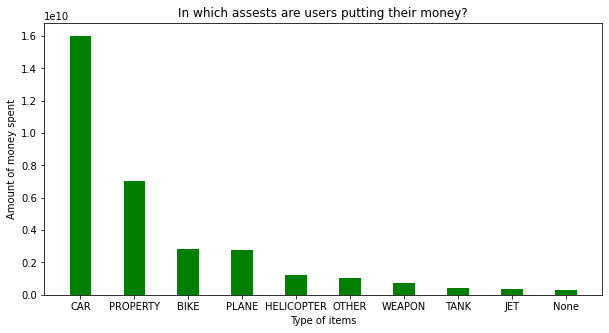

In [85]:
#create a bar char of these things
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(items['item_type'], items['Amount_spent'], color ='green',
        width = 0.4)
 
plt.xlabel("Type of items")
plt.ylabel("Amount of money spent")
plt.title("In which assests are users putting their money?")
plt.show()

In [86]:
#top ten of items bought by volume
specific_items = pysqldf('''select item_type as item_type, item as specific_item, sum(money_spent) as Amount_spent
from items 
group by specific_item
order by Amount_spent desc
limit 10''')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 8))



PandaSQLException: ignored

In [ ]:
#amount of hours in tasks spend by weeks, growing over time
stats.resample('W', on='occur_date').daily_playtime.sum()

In [ ]:
#activities in which they are spending most of their time

print(pysqldf('''select activity_type, sum(time_spent) as time_spend_overall
from activity 
group by activity_type
ORDER BY time_spend_overall desc'''))

In [ ]:
#while looking at our dataset, we found an ID that played 5570.873231 in total
#which is around 200 days, which is more than the three week spam
#thus, we must conclude that some activities are simulatenous, in order for this to be true
 
pysqldf('''select account_id, sum(time_spent) as sum_by_id
from activity 
group by account_id
order by sum_by_id desc''')

#thus, to find the time each user spend playing on those three months, we need to analyze general player stats

In [ ]:
data_for_time = pysqldf('''select account_id, sum(daily_playtime) as total_time_playing
from stats 
group by account_id
order by total_time_playing desc''')

data_for_time.describe()

Jaden's part in data creation and clustering

In [129]:
#jaden, dont touch
df = pd.read_csv('gen_player_stats.csv')
iets = []
for x in df['occur_date']:
    iets.append(datetime.strptime(x, '%Y-%m-%d'))
df['occur_datetime'] = iets

m = max(df['occur_datetime'])
mi = min(df['occur_datetime'])
x = pd.date_range(mi,m,12).to_list()


x_clean = []
for i in x: 
    x_clean.append(i.strftime("%Y-%m-%d"))
x_clean
x = x_clean
unique_id = df['account_id'].unique()

super_array = []

for user in unique_id:
    array = np.zeros(11)
    #print(user)
    per_user_df = df[df['account_id'] == user]
    for i in range(0,12):
        for z in per_user_df['occur_date']:
            if x[i] < z < x[i+1]:
                array[i] = 1
                #print(f'z: {z} is in range between {x[i]} and {x[i+1]} for i: {i}')
    super_array.append(array)
sa = np.array(super_array)

df_super = pd.DataFrame(sa, columns=['1','2','3','4','5','6','7','8','9','10','11'])

v_len = len(super_array[:][:])
s = super_array
force_array = []
for i in range(v_len):
    force = 0
    mtm = 0
    switch = 0
    for j in s[i][:]:
        if (j == 0) & (switch == 1):
          #exponentially punishing players who take a longer break
            force += 2**(mtm)
            mtm += 1
        if j == 1:
          #reset the momentum after the player comes back to the game
            mtm = 0
            switch = 1
    force_array.append(force)
df_super['force'] = force_array
df_super['force'] = [math.log(x,2) if x != 0 else 0 for x in df_super['force']]



In [130]:
#rereading items df since it was changed previously
df_items = pd.read_csv('item_spend.csv')
df_items['occur_date'] = pd.to_datetime(df_items['occur_date'])


In [131]:
#sql query to get the total money spent by each user
pysqldf = lambda q: sqldf(q, globals())


total_money_spent = pysqldf('''select account_id, sum(money_spent) as sum_by_id
from df_items 
group by account_id''')

In [132]:
total_money_spent = total_money_spent.set_index('account_id',drop=True)

In [133]:
activity_grouped_no_normalization = activity_grouped_no_normalization[['activity_type_Biker','activity_type_Casino','activity_type_Executive','activity_type_Freeroam - Business Battles','activity_type_Gunrunner','activity_type_Heist','activity_type_Nightclub Owner','activity_type_Race']]


In [134]:
all_index = list(range(0,9527))
#not every user has done an activity, so we need to fill missing indexes with 0
activity_grouped_no_normalization = activity_grouped_no_normalization.reindex(all_index)
activity_grouped_no_normalization = activity_grouped_no_normalization.fillna(0)

In [135]:
items_grouped_no_normalization = items_grouped_no_normalization[['item_type_BIKE','item_type_BOAT','item_type_CAR','item_type_CYCLE','item_type_HELICOPTER','item_type_JET','item_type_OTHER','item_type_PLANE','item_type_PROPERTY','item_type_TANK','item_type_TRUCK','item_type_WEAPON']]

In [136]:
#not every user has got an item, so we need to fill missing indexes with 0
items_grouped_no_normalization = items_grouped_no_normalization.reindex(all_index)
items_grouped_no_normalization = items_grouped_no_normalization.fillna(0)

In [137]:
#ID's who have spent
spent_money = stats[stats['pvc_balance'] != 0]
spending_id = spent_money['account_id'].unique()
#array containing all ids that have spent money

In [138]:
#building the final dataframe

final_df = time_spent_per_day.copy()
final_df['force'] = df_super['force']

diversity_activities = activity_grouped['diversity']
all_index = list(range(0,9527))
#not every user has done an activity, so we need to fill missing indexes with 0
diversity_activities = diversity_activities.reindex(all_index)
diversity_activities = diversity_activities.fillna(0)
final_df['diversity_activities'] = diversity_activities

diversity_items = items_grouped
diversity_items = diversity_items.reindex(all_index)
diversity_items = diversity_items.fillna(0)
final_df['diversity_items'] = diversity_items

total_money_spent = total_money_spent.reindex(all_index)
total_money_spent = total_money_spent.fillna(0)
final_df['total_money_spent'] = total_money_spent

#normalize money by  day's played to not punish players who started later
final_df['daily_money_spent'] = final_df['total_money_spent']/final_df['days_since_start']
final_df = final_df.drop(['days_since_start','time_played','total_money_spent'],axis=1)

In [139]:
final_df

,play_time_per_day,force,diversity_activities,diversity_items,daily_money_spent
account_id,,,,,
0,0.113503,0.000000,1.000,0.250000,11747.496444
1,0.154117,1.584963,0.750,0.166667,3871.956466
2,0.202231,0.000000,0.625,0.250000,20884.941186
3,0.364728,0.000000,0.625,0.500000,50482.445717
4,0.206744,3.906891,0.125,0.083333,9418.780008
...,...,...,...,...,...
9522,0.027698,1.000000,0.250,0.250000,8885.430734
9523,0.047204,8.997179,0.500,0.083333,6134.845734
9524,0.073091,3.321928,0.375,0.083333,22699.594120


In [144]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

df = final_df
target = df['play_time_per_day']
a = np.percentile(target, 90)
count = len(df[df['play_time_per_day'] > a])
superUser = [1 if x > a else 0 for x in target]

def Scale(df):
    scaled_features = MinMaxScaler().fit_transform(df.values)
    scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
    df = scaled_features_df
    return df
def Split(df,target):
    y = df[target]
    X = df.drop(columns=target)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    return X_train, X_test, y_train, y_test

df = Scale(df)
df['superUser'] = superUser
df = df.drop(columns=['play_time_per_day'])
t_name = 'superUser'
X_train, X_test, y_train, y_test = Split(df,t_name)
def log_reg(X_train,y_train,X_test,y_test):
    clf = LogisticRegression(class_weight='balanced',random_state=0).fit(X_train, y_train)
    beta = clf.coef_
    y_pred = clf.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_pred, y_test)
    return auc, beta, cm
auc, beta, cm = log_reg(X_train,y_train,X_test,y_test)



In [102]:
"""
JADEN PUT ML SHIT HERE clustering and stuff
"""
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
dfA = final_df
dfA['deposit'] = [1 if x in spending_id else 0 for x in final_df.index]
X = Scale(dfA).to_numpy()


def km_i(X,k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    i = kmeans.inertia_
    return i
sse = []
for k in range(1, 11):
    i = km_i(X,k)
    sse.append(i)
from sklearn.metrics import silhouette_score
def km(X,k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    i = kmeans.inertia_
    score = silhouette_score(X, kmeans.labels_)
    return score
sc = []
for k in range(2, 11):
    i = kmeans = km(X,k)
    sc.append(i)

kmeans = KMeans(n_clusters=2)
y = kmeans.fit_predict(X)
dfA['cluster'] = y
c1 = dfA[dfA['cluster'] == 1]
c2 = dfA[dfA['cluster'] == 0]

#c1.describe()
#plt.figure(figsize=(15,10))
#for i,col in enumerate(c1.columns,1):
    #plt.subplot(3,3,i)
    #plt.title(f"Distribution of {col} Data")
    #sns.histplot(c1[col],kde=True)
    #plt.tight_layout()
    #plt.plot()
#c0.describe()
#plt.figure(figsize=(15,10))
#for i,col in enumerate(c0.columns,1):
    #plt.subplot(3,3,i)
    #plt.title(f"Distribution of {col} Data")
    #sns.histplot(c0[col],kde=True)
    #plt.tight_layout()
    #plt.plot()

In [127]:
final_df

,play_time_per_day,force,diversity_activities,diversity_items,daily_money_spent
account_id,,,,,
0,0.113503,0.000000,1.000,0.250000,11747.496444
1,0.154117,1.584963,0.750,0.166667,3871.956466
2,0.202231,0.000000,0.625,0.250000,20884.941186
3,0.364728,2.807355,0.625,0.500000,50482.445717
4,0.206744,4.169925,0.125,0.083333,9418.780008
...,...,...,...,...,...
9522,0.027698,1.000000,0.250,0.250000,8885.430734
9523,0.047204,8.997179,0.500,0.083333,6134.845734
9524,0.073091,3.321928,0.375,0.083333,22699.594120
